In [1]:
import numpy as np
import tifffile
from scipy import ndimage
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops


file_name = f"/Users/demir/Documents/Hva_AI/afstudeerproject/codes_yunus/input/tif_deneme_1.tif"

img = tifffile.imread(file_name)  # (Z, C, Y, X)
print(img.shape)

# Sadece 4. kanalı (C3, index 3) tüm Z-stack ile al
channel_index = 3
c3_stack = img[:, channel_index, :, :]  # Shape: (9, 1024, 1024)

print(c3_stack.shape)

(9, 4, 1024, 1024)
(9, 1024, 1024)


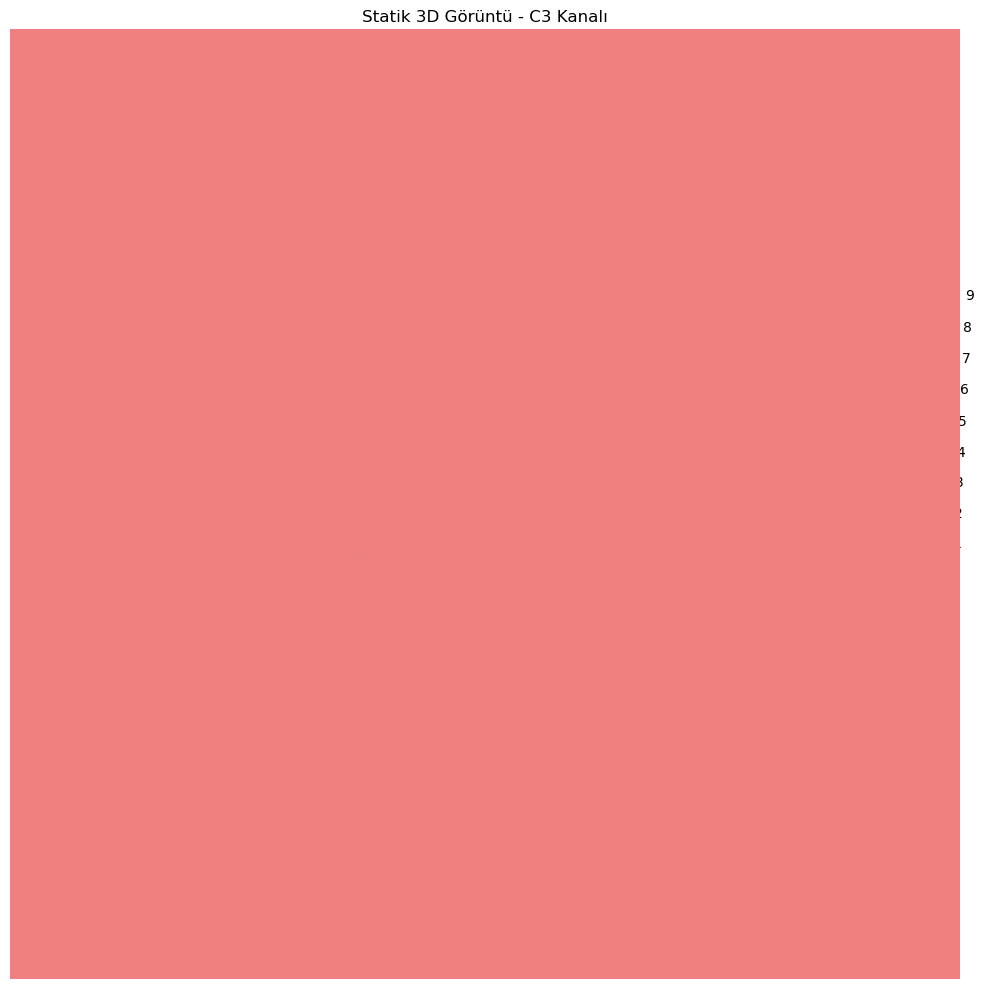

In [2]:
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 1. Z-stack üzerinde Otsu ile eşikleme
# Her slice'a ayrı ayrı değil, tüm hacme birlikte uyguluyoruz
global_thresh = threshold_otsu(c3_stack)
binary_stack = c3_stack > global_thresh  # Boolean mask

# 2. Marching Cubes ile yüzey çıkarımı
verts, faces, normals, values = measure.marching_cubes(binary_stack.astype(np.uint8), level=0)

# 3. Statik 3D Görselleştirme
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

mesh = Poly3DCollection(verts[faces], alpha=0.7)
mesh.set_facecolor('lightcoral')
ax.add_collection3d(mesh)

# Eksen boyutlarını ayarla
ax.set_xlim(0, binary_stack.shape[2])  # X
ax.set_ylim(0, binary_stack.shape[1])  # Y
ax.set_zlim(0, binary_stack.shape[0])  # Z
ax.set_box_aspect([1, 1, 0.5])  # Z daha az derin çünkü 9 slice var

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Statik 3D Görüntü - C3 Kanalı')
plt.tight_layout()
plt.show()
